In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

print(star_wars.head(10))
print(star_wars.columns)

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [2]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [3]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map({"Yes":True,"No":False})
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map({"Yes":True,"No":False})

In [4]:
import numpy as np

col = ["Which of the following Star Wars films have you seen? Please select all that apply."
        ,"Unnamed: 4"
        ,"Unnamed: 5"
        ,"Unnamed: 6"
        ,"Unnamed: 7"
        ,"Unnamed: 8"]
names = ["Star Wars: Episode I  The Phantom Menace"
        ,"Star Wars: Episode II  Attack of the Clones"
        ,"Star Wars: Episode III  Revenge of the Sith"
        ,"Star Wars: Episode IV  A New Hope"
        ,"Star Wars: Episode V The Empire Strikes Back"
        ,"Star Wars: Episode VI Return of the Jedi"]
new_names = ["seen_1"
            ,"seen_2"
            ,"seen_3"
            ,"seen_4"
            ,"seen_5"
            ,"seen_6"]


for i in range(len(col)):
    star_wars[col[i]] = star_wars[col[i]].map({names[i]: True, None: False})


for i in range(len(col)):
    try:
        star_wars = star_wars.rename(columns = {col[i] : new_names[i]})
    except:
        pass

print(star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  \
1   True   True   Tru

In [16]:
col2 = ["Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."
        ,"Unnamed: 10"
        ,"Unnamed: 11"
        ,"Unnamed: 12"
        ,"Unnamed: 13"
        ,"Unnamed: 14"]
new_names2 = ["ranking_1"
            ,"ranking_2"
            ,"ranking_3"
            ,"ranking_4"
            ,"ranking_5"
            ,"ranking_6"]
try:
    star_wars[col2] = star_wars[col2].astype(float)
except:
    pass

for i in range(len(col)):
    try:
        star_wars = star_wars.rename(columns = {col2[i] : new_names2[i]})
    except:
        pass

print(star_wars.head())


   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  ranking_1  \
1   True  

[3.7329341317365268, 4.0873205741626792, 4.341317365269461, 3.2727272727272729, 2.513157894736842, 3.0478468899521531]


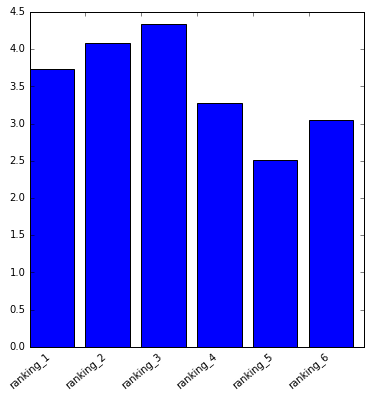

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
avg = []
for i in range(len(new_names2)):
    avg.append(star_wars[new_names2[i]].mean())

print(avg)
fig, ax = plt.subplots(figsize=(6,6))    
ax.bar(range(len(new_names2)),avg)
ax.set_xticklabels(new_names2,rotation = 40)

    

[673, 571, 550, 607, 758, 738]


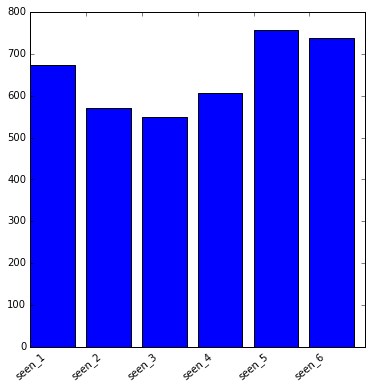

In [33]:
seen_sum = []
for i in range(len(new_names)):
    seen_sum.append(star_wars[new_names[i]].sum())
    
print(seen_sum)
fig, ax = plt.subplots(figsize=(6,6))    
ax.bar(range(len(new_names)),seen_sum)
ax.set_xticklabels(new_names,rotation = 40)



In [35]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

[4.0378250591016549, 4.2245862884160754, 4.2748815165876781, 2.9976359338061465, 2.458628841607565, 3.0023640661938535]
[3.4292929292929295, 3.9546599496221662, 4.4181360201511337, 3.5440806045340052, 2.5692695214105794, 3.0780856423173804]
[361, 323, 317, 342, 392, 387]
[298, 237, 222, 255, 353, 338]


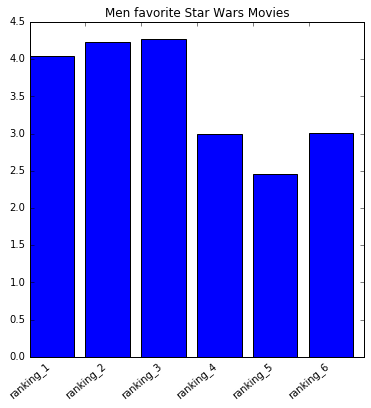

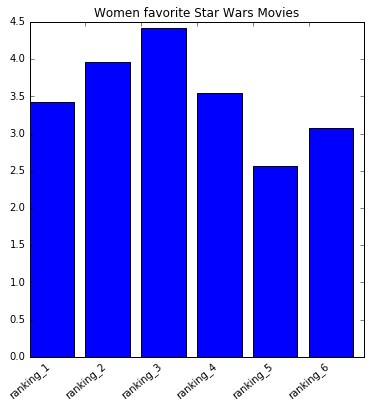

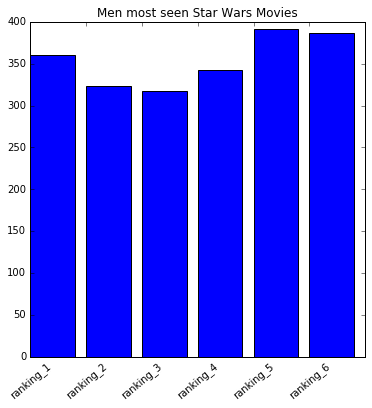

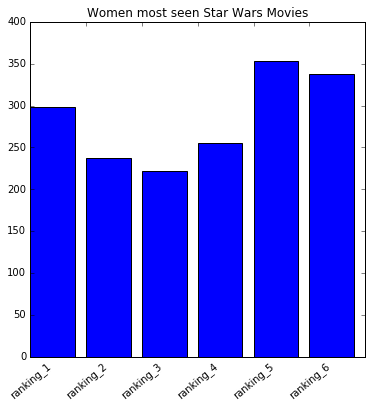

In [51]:
avg_men = []
avg_women = []
sum_men = []
sum_women = []

for i in range(len(new_names2)):
    avg_men.append(males[new_names2[i]].mean())
    avg_women.append(females[new_names2[i]].mean())
    sum_men.append(males[new_names[i]].sum())
    sum_women.append(females[new_names[i]].sum())
    
print(avg_men)
print(avg_women)
print(sum_men)
print(sum_women)

fig, ax = plt.subplots(figsize=(6,6))    
ax.bar(range(len(new_names2)),avg_men)
ax.set_xticklabels(new_names2,rotation = 40)
ax.set_title("Men favorite Star Wars Movies")

fig, ax = plt.subplots(figsize=(6,6))    
ax.bar(range(len(new_names2)),avg_women)
ax.set_xticklabels(new_names2,rotation = 40)
ax.set_title("Women favorite Star Wars Movies")

fig, ax = plt.subplots(figsize=(6,6))    
ax.bar(range(len(new_names2)),sum_men)
ax.set_xticklabels(new_names2,rotation = 40)
ax.set_title("Men most seen Star Wars Movies")

fig, ax = plt.subplots(figsize=(6,6))    
ax.bar(range(len(new_names2)),sum_women)
ax.set_xticklabels(new_names2,rotation = 40)
ax.set_title("Women most seen Star Wars Movies")